# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [49]:
df = pd.read_csv('Datasets/Crimes_2001_to_present.csv',
                 usecols =[2,19,20])
df.head()

,Date,Latitude,Longitude
0,02/15/2018 02:03:00 PM,41.875458,-87.710093
1,03/18/2015 07:45:00 PM,41.865708,-87.721499
2,03/17/2015 11:26:00 AM,41.884548,-87.737191
3,03/16/2015 07:20:00 PM,41.861026,-87.696581
4,03/16/2015 08:44:00 PM,41.770525,-87.653424


Get rid of any _rows_ that have nans in them:

In [50]:
df.dropna(axis=0,inplace=True)

Display the `dtypes` of your dset:

In [51]:
df.dtypes

Date          object
Latitude     float64
Longitude    float64
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [52]:
df.Date = pd.to_datetime(df.Date, errors='coerce')
df.dtypes

,Date,Latitude,Longitude
0,2018-02-15 14:03:00,41.875458,-87.710093
1,2015-03-18 19:45:00,41.865708,-87.721499
2,2015-03-17 11:26:00,41.884548,-87.737191
3,2015-03-16 19:20:00,41.861026,-87.696581
4,2015-03-16 20:44:00,41.770525,-87.653424
5,2015-03-16 19:48:00,41.789864,-87.653550
6,2015-03-16 11:18:00,41.889903,-87.721811
7,2015-03-15 13:52:00,41.727071,-87.598536
8,2015-03-15 13:23:00,41.780763,-87.667886
9,2015-03-14 20:43:00,41.721635,-87.630269


In [69]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    print(df.shape)
    df = df.drop('Date', 1)
    print(df.shape)

    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model = KMeans(n_clusters=7)
    model.fit(df)

    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,1], centroids[:,0], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

(3145, 3)
(3145, 2)
[[ 41.8900198  -87.75485007]
 [ 41.75033989 -87.57999513]
 [ 41.98350221 -87.68715349]
 [ 41.7756854  -87.6649696 ]
 [ 41.87539857 -87.71063853]
 [ 41.70559452 -87.63498384]
 [ 41.79182557 -87.61917907]]


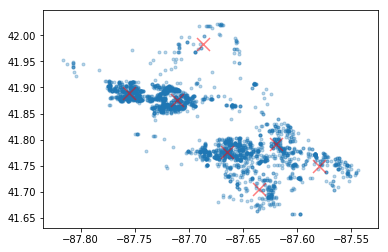

In [72]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

In [71]:
df.shape
df = df[df.Date > pd.to_datetime('2011-01-01')]
df.shape

(3145, 3)

(3145, 3)
(3145, 2)
[[ 41.87539857 -87.71063853]
 [ 41.79081871 -87.61994642]
 [ 41.8900198  -87.75485007]
 [ 41.70596565 -87.6347654 ]
 [ 41.98350221 -87.68715349]
 [ 41.77585198 -87.66554146]
 [ 41.75054472 -87.57959009]]


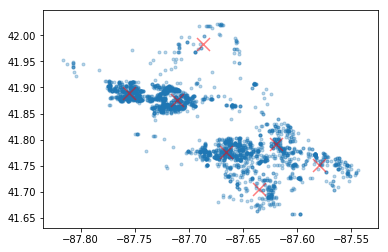

In [64]:
# Print & Plot your data
doKMeans(df)